## 농구선수의 게임 데이터를 활용한 포지션 예측을 위한 데이터 정제

#### 문제 정의
NBA 농구 선수들의 게임 기록을 데이터로 사용해서 특정 농구 선수의 포지션을 예측

In [50]:
import pandas as pd

In [51]:
df = pd.read_csv("../Data/basketball.csv")
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


- Player : 선수 이름  
- Pos : 포지션 (SG : Shooting Guard(키 작은사람), C : Center(키큰사람))  
> 한경기당 조건이 다 똑같아야해   
- 3P : 한 경기당 평균 3점슛 성공 횟수  
- 2P : 한 경기당 평균 2점슛 성공 횟수  
- TRB : 한 경기당 평균 리바운드 성공 횟수  
- AST : 한 경기당 평균 어시스트 성공 횟수  
- STL : 한 경기당 평균 스틸 성공 횟수  
- BLK : 한 경기당 평균 블로킹 성공 횟수  

In [52]:
# 포지션의 종류 파악
df['Pos'].unique()

array(['SG', 'C'], dtype=object)

In [53]:
# 포지션별 갯수 파악(R의 table와 같아 value_counts())
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

#### 포지션 별 내용
- C : 골대, 포스트 근처에서 슛을 블로킹하고 리바운드하며 바깥으로 쳐내며 골대 근처에서 2점슛으로 득점을 한다.
- SG : 코트내에서 3점슛 등 장거리에서 슛을 해서 점수를 얻는 역할

### 데이터 시각화(Feature찾기)
데이터를 특징을 바탕으로 한 공간에서 시각화 함으로써 머신러닝 학습에 필요한 '특징'(Feature(Column)인지 아닌지)과
불필요한 특징을 쉽게 구분

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

#### 스틸과 2점슛 데이터 시각화

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


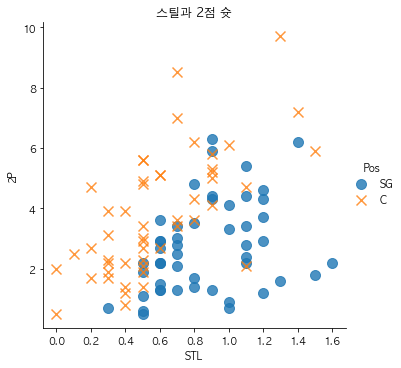

In [56]:
sns.lmplot(
    'STL',
    '2P',
    data = df,
    scatter_kws={'s' : 100}, # 좌표상의 점의 크기
    hue = 'Pos', # 대상값
    fit_reg=False,
    markers=['o','x']
)
plt.title("스틸과 2점 슛")
plt.show()

> SVM이나 KNN쓰면 좋을꺼 같은데?

### 어시스트와 2점슛 데이터 시각화

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


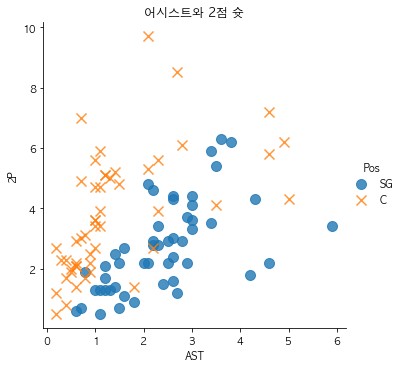

In [57]:
sns.lmplot(
    'AST',
    '2P',
    data = df,
    scatter_kws={'s' : 100}, # 좌표상의 점의 크기
    hue = 'Pos', # 대상값
    fit_reg=False,
    markers=['o','x']
)
plt.title("어시스트와 2점 슛")
plt.show()

> 2점슛, 어시스트, 스틸 속성으로 데이터를 분포시킬 경우 슈팅가드와 센터의 경계가 너무 근점해서 분류하기 모호하다.

### 블로킹과 3점슛 데이터 시각화

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


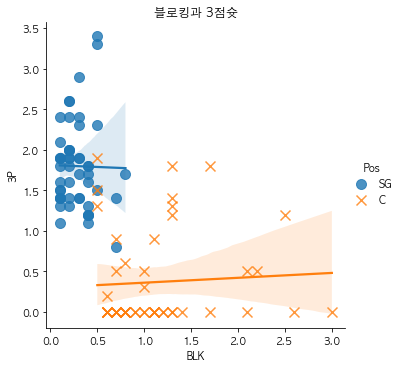

In [58]:
sns.lmplot(
    'BLK',
    '3P',
    data = df,
    scatter_kws={'s' : 100}, # 좌표상의 점의 크기
    hue = 'Pos', # 대상값
    # fit_reg=False,
    markers=['o','x']
)
plt.title("블로킹과 3점슛")
plt.show()

> 동일한 분류끼리는 서로 근접해 있고, 다른 분류와는 멀리 떨어져있음  
> 시각화한 분류에서 데이터의 구분이 확실한 경우 선택된 속성들이 머신러닝 정확도에 큰 도움을 준다.  
> 회귀선이 둘다 수평을 이룬다는것은 분리가 가능하다  
> Feature로 사용하기 적합하고, SVM과 KNN을 사용하기 적합한거 같다!

### 리바운드와 3점슛 시각화

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


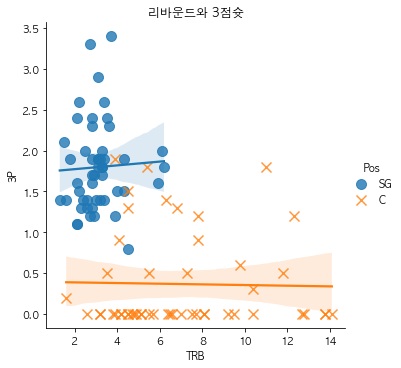

In [59]:
sns.lmplot(
    'TRB',
    '3P',
    data = df,
    scatter_kws={'s' : 100}, # 좌표상의 점의 크기
    hue = 'Pos', # 대상값
    # fit_reg=False,
    markers=['o','x']
)
plt.title("리바운드와 3점슛")
plt.show()

> 동일한 분류끼리는 서로 근접해 있고, 다른 분류와는 멀리 떨어져있음  
> 시각화한 분류에서 데이터의 구분이 확실한 경우 선택된 속성들이 머신러닝 정확도에 큰 도움을 준다.  
> 회귀선이 둘다 수평을 이룬다는것은 분리가 가능하다  
> Feature로 사용하기 적합함. SVM, KNN 사용하면 됨!

# 데이터 다듬기
- 분별력이 없는 특징(Feature) 을 데이터에서 제거
- 시각화를 통해 확인해 본 결과 2P, AST, STL은 분별력이 없다.

In [60]:
# 분별력이 없는 특징(Feature) 제거
df.drop(['2P','AST','STL'], axis=1, inplace=True)
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [61]:
from sklearn.model_selection import train_test_split

In [65]:
# label이 없는걸 학습데이터와 검증데이터로 나누기

# 다듬어진 데이터에서 20%(test_size=0.2)를 테스트 데이터로 분류합니다
# 알아서 랜덤으로 정의됨.
train, test = train_test_split(df, test_size=0.2)


In [66]:
train.shape

(80, 5)

In [67]:
test.shape

(20, 5)

In [63]:
import pandas as pd

In [68]:
# 데이터 저장하기
train.to_csv("../Data/basketball_train.csv", index=False)
test.to_csv("../Data/basketball_test.csv", index=None)